# MNIST classification

----



## Data Process

### Loading and Visualization

<div dir=rtl>
با استفاده از سلول زیر، دیتاست را لود کنید.

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(f'We have {x_train.shape[0]} samples')
print(f'Each sample image has {x_train.shape[1]} * {x_train.shape[2]} shape')
print(f'We also have {x_test.shape[0]} samples for testing')

We have 60000 samples
Each sample image has 28 * 28 shape
We also have 10000 samples for testing


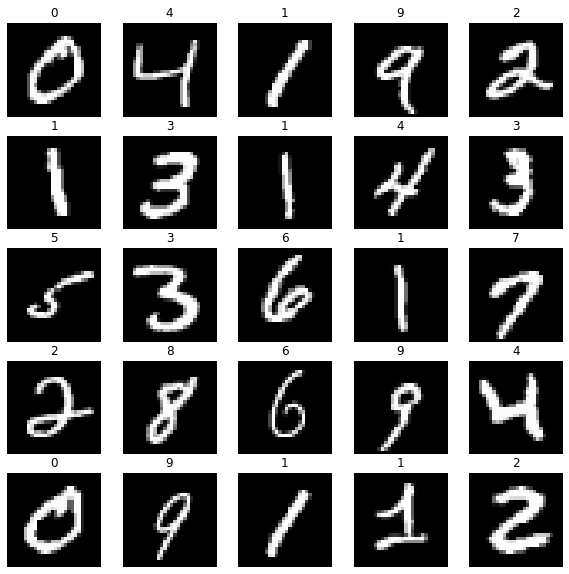

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize= (10, 10))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(x_train[i], cmap= 'gray')
    plt.title(y_train[i])
    plt.axis(False)

### Data Preprocessing

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Flattening the data to use it with classifiers
print(x_train.shape)

(60000, 784)


In [5]:
import numpy as np
print(np.max(x_train))
print(np.max(x_test))

x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

# making the pixels between 0 and 1
print(np.max(x_train))
print(np.max(x_test))

255
255
1.0
1.0


## Model Training

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def test(model):

    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy of your model is {acc:.3f}')
    print('Your confustion matrix is:')
    s = sns.heatmap(cm, annot=True, fmt='d')
    s.set(xlabel='True labels', ylabel='Predicted labels')
    plt.show() 

    print('Some random tests:')
    random_indexs = np.random.choice(x_test.shape[0], 8)
    plt.figure(figsize= (15, 10))
    for i in range(1, 9):
        plt.subplot(1, 8, i)
        plt.imshow(x_test[random_indexs[i-1]].reshape(28, 28), cmap='gray')
        plt.title(f'Prediction is {y_pred[random_indexs[i-1]]}')
        plt.axis(False)


###    Gaussian Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

Accuracy of your model is 0.556
Your confustion matrix is:


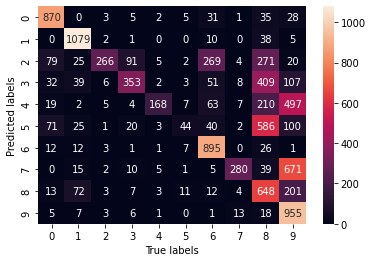

Some random tests:


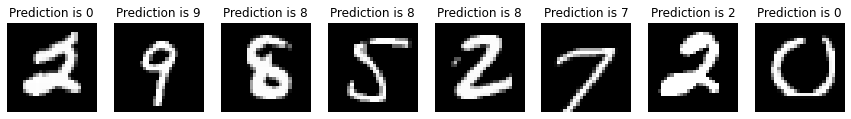

In [10]:
test(model)

###    Desicion Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

Accuracy of your model is 0.880
Your confustion matrix is:


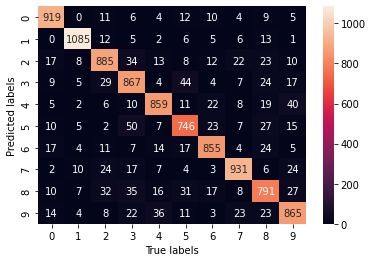

Some random tests:


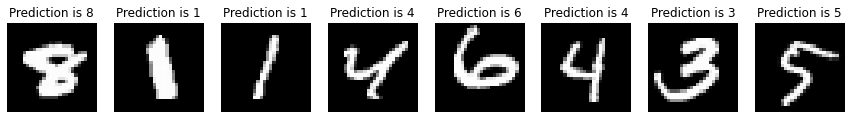

In [12]:
test(model)

###    Random Forest

Accuracy of your model is 0.943
Your confustion matrix is:


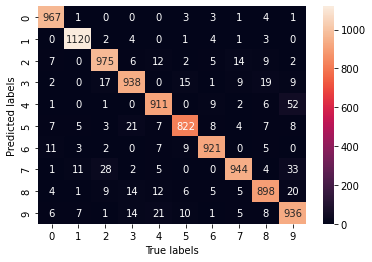

Some random tests:


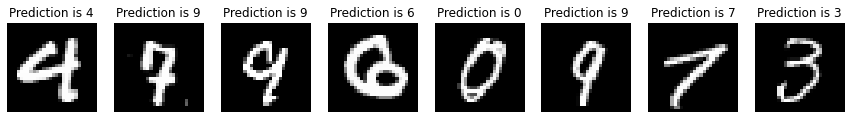

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 25, max_depth= 10)
model.fit(x_train, y_train)
test(model)

Accuracy of your model is 0.946
Your confustion matrix is:


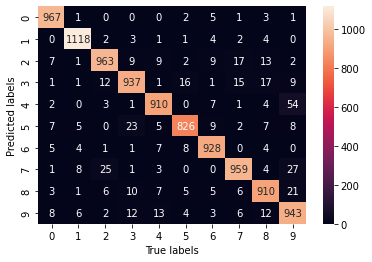

Some random tests:


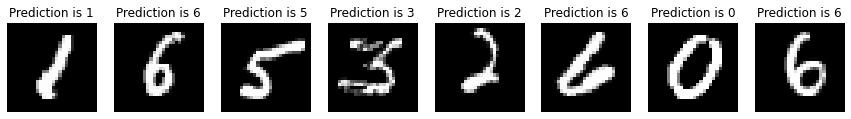

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 50, max_depth= 10)
model.fit(x_train, y_train)
test(model)

Accuracy of your model is 0.947
Your confustion matrix is:


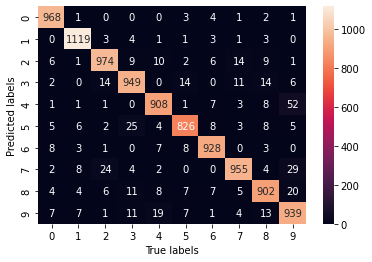

Some random tests:


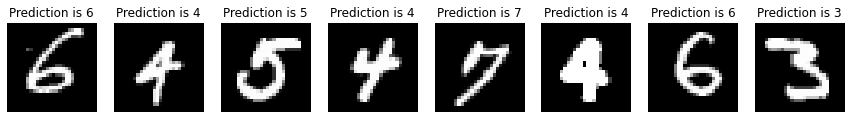

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 75, max_depth= 10)
model.fit(x_train, y_train)
test(model)

Accuracy of your model is 0.947
Your confustion matrix is:


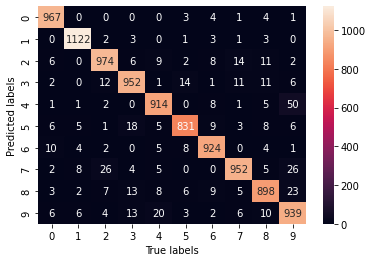

Some random tests:


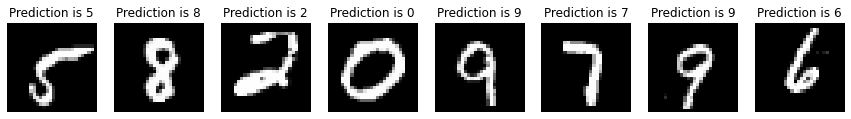

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 100, max_depth= 10)
model.fit(x_train, y_train)
test(model)


###    Logistic Regression

Accuracy of your model is 0.926
Your confustion matrix is:


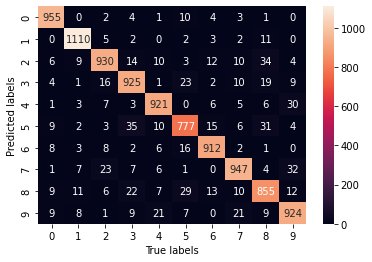

Some random tests:


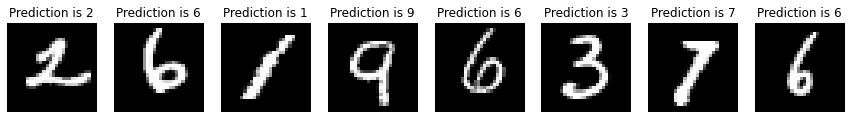

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 2000)
model.fit(x_train, y_train)
test(model)

###    SVM

Accuracy of your model is 0.979
Your confustion matrix is:


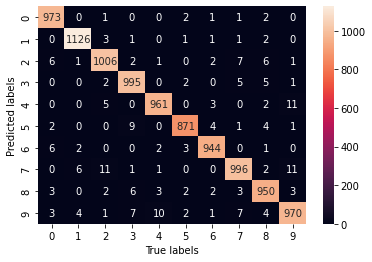

Some random tests:


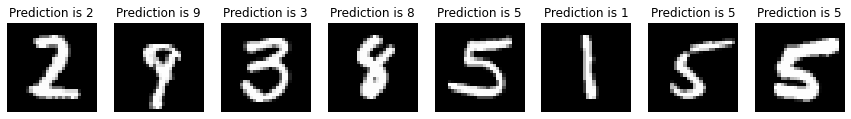

In [20]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
test(model)

###    MLP

Accuracy of your model is 1.000
Your confustion matrix is:


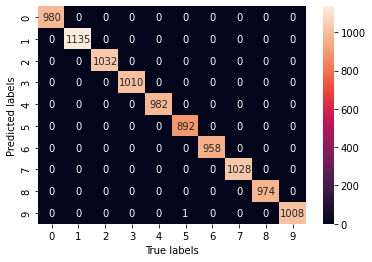

Some random tests:


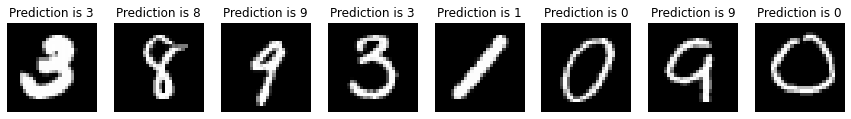

In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier([64, 32, 16, 8])
model.fit(x_test, y_test)
test(model)

Accuracy of your model is 1.000
Your confustion matrix is:


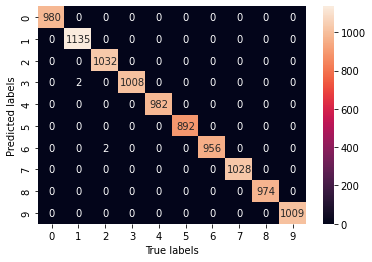

Some random tests:


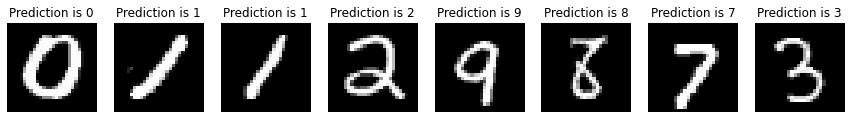

In [22]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier([32, 32, 16, 16, 8, 8])
model.fit(x_test, y_test)
test(model)